# COGS 108 - Final Project

## Group Members: Fill in the Student ID's of each group member here
- A13353652 Jiahao Zhao
- A13749314 Austin Nguyen
- A13952215 Andy Ruan

# Introduction

### Research Question

Which counties of the United States are most in need for hospitals? 

### Hypothesis

Rural areas of the United States will need more hospitals than urban areas.
The reason being that the population in urban cities are higher.

### Abstract

*Data Cleaning*
    The census and the hospital data seem to have no holes in their data set. The only cleaning we need to do to merge the two data sets together properly is to remove the word, “county” in the census data for every row in the county column.
    
*Data Analysis*
    We will be able to do a data analysis by an r correlation coefficient. Visual data analysis by having scatter plot with an x axis of population in a given county and y axis having the number of hospitals in that county. From this we can calculate a regression line of best fit as well as see a trend of the hospital to county. 

*What to report*
    We will report if there is a trend between population and the number of hospitals in a particular county. From this, we can also make recommendation to counties that have too few hospitals in their area. 

Packages we plan to use:
- a. panda
- b. matplotlib.pyplot
- c. numpy

### Data Description

- Dataset Name: Hospitals
- Link to the dataset: https://hifld-dhs-gii.opendata.arcgis.com/datasets/e13641c764344b8ab7dfd41831e56940_0
- Number of observations: 7332

1-2 sentences describing the dataset. 
    This database contains locations of Hospitals for 50 US states.
    The database does not contain nursing homes or health centers.

- Dataset Name: 2010 Census Population Estimation
- Link to the dataset: https://www2.census.gov/programs-surveys/popest/datasets/2010/2010-eval-estimates/
- Number of observations: 3195

1-2 sentences describing the dataset. 
    This dataset contains the 2010 population estimate by county.

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.
    Sort the hospital dataset by county, then add the number of hospitals in that county.
    Then, we combine the census dataset with the hospital set by their counties.

### Background

Referencess (include a link):
- 1) This article talks about how poor neighborhoods in the U.S. don't have enough access to medical care.
    http://newsinteractive.post-gazette.com/longform/stories/poorhealth/1/
- 2) This article talks about why there are less doctors in the rural area.
    https://www.theatlantic.com/health/archive/2014/08/why-wont-doctors-move-to-rural-america/379291/

## Imports

In [525]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind

## Load & Clean the Data

In [526]:
#Loading data sets
hospitals = pd.read_csv('Hospitals.csv')
census = pd.read_csv('census.csv')
states = pd.read_csv('us_states.csv')

In [527]:
#Cleaning hospital data set
hospitals = hospitals[['STATE', 'COUNTY', 'POPULATION']]

In [528]:
#Clean census data set; drop the population of the state
census = census[['STNAME', 'CTYNAME','POPESTIMATE2010']]

for i, row in census.iterrows():
    if (row['STNAME'] == row['CTYNAME']):
        census.drop(i, inplace=True)

In [529]:
#Convert state names to its abbreviation
for i, row1 in states.iterrows():
    for j, row2 in census.iterrows():
        if (row2['STNAME'] == row1['State']):
            census.loc[j, 'STNAME'] = states.loc[i, 'Abb']

In [530]:
#Remove the substring 'County' and make everything upper case to match the hospital data
for i, row in census.iterrows():
    census.loc[i, 'CTYNAME'] = row['CTYNAME'].replace(' County', '').upper()


In [531]:
#Sorting the names
hospitals = hospitals.sort_values('COUNTY')
census = census.sort_values('CTYNAME')

In [532]:
#Grouping number of hospitals by county
hospital = pd.DataFrame({'Hospital_Count' : hospitals.groupby( [ "STATE", "COUNTY"] ).size()}).reset_index()

In [533]:
#Renaming columns
census = census.rename(columns = {'STNAME': 'STATE'})
census = census.rename(columns = {'CTYNAME': 'COUNTY'})

In [534]:
#Combine state and county name to merge them
hospital["stateCounty"] = hospital["STATE"].map(str) + " " + hospital["COUNTY"]

census["stateCounty"] = census["STATE"].map(str) + " " + census["COUNTY"]
census = census.drop(['STATE', 'COUNTY'], axis=1)

hospital = hospital.drop(['STATE', 'COUNTY'], axis=1)

In [535]:
#Merging cesnsus with hospital dataframe
hos_pop = pd.merge(census, hospital, on='stateCounty')

In [536]:
#get the number of hospital per 100000 people
hos_pop["hos_per_cap"] = hos_pop["Hospital_Count"].map(int) / hos_pop["POPESTIMATE2010"] * 100000

#sort by hospital per capita
hos_pop = hos_pop.sort_values('hos_per_cap')
hos_pop


,POPESTIMATE2010,stateCounty,Hospital_Count,hos_per_cap
50,524834,MD ANNE ARUNDEL,2,0.381073
2349,261117,CO WELD,1,0.382970
1834,2319777,NY QUEENS,10,0.431076
766,230250,MD FREDERICK,1,0.434311
1104,220066,MO JEFFERSON,1,0.454409
1966,219974,NY SARATOGA,1,0.454599
359,217186,GA CHEROKEE,1,0.460435
2215,201993,NC UNION,1,0.495067
1815,392412,VA PRINCE WILLIAM,2,0.509668
432,195766,OH CLERMONT,1,0.510814


# Data Visualization

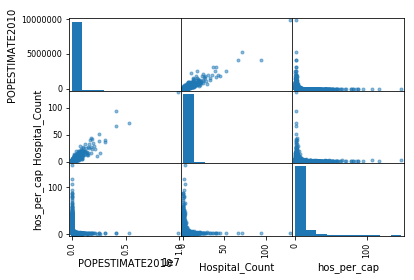

In [537]:
#visual display with graphs
fig = pd.scatter_matrix(hos_pop)

(array([  2.37300000e+03,   5.20000000e+01,   1.00000000e+01,
          5.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   13.8,   26.6,   39.4,   52.2,   65. ,   77.8,   90.6,
         103.4,  116.2,  129. ]),
 <a list of 10 Patch objects>)

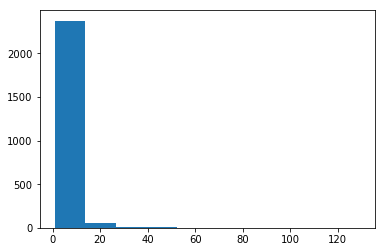

In [538]:
#hos_pop['hos_per_cap'].value_counts().plot(kind='bar')
#plt.hist(hos_pop['POPESTIMATE2010']['Hospital_Count'])
plt.hist(hos_pop[hos_pop['POPESTIMATE2010'] != 0]['Hospital_Count'])

# Data Analysis

In [539]:
outcome, predictors = patsy.dmatrices('Hospital_Count ~ POPESTIMATE2010', hos_pop)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Hospital_Count   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Tue, 13 Jun 2017   Prob (F-statistic):               0.00
Time:                        23:45:42   Log-Likelihood:                -5225.6
No. Observations:                2444   AIC:                         1.046e+04
Df Residuals:                    2442   BIC:                         1.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.0719      0.044     

In [540]:
outcome, predictors = patsy.dmatrices('POPESTIMATE2010 ~ Hospital_Count', hos_pop)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        POPESTIMATE2010   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Tue, 13 Jun 2017   Prob (F-statistic):               0.00
Time:                        23:45:43   Log-Likelihood:                -32284.
No. Observations:                2444   AIC:                         6.457e+04
Df Residuals:                    2442   BIC:                         6.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -4.745e+04   2995.343    -15.

# Results

After cleaning the data set we are able to create visual representations. Upon creating visual representations one can see that there seems to be a strong correlation between the number of hospitals and the population. After calculating Pearson's R coefficient we recieved a value of .862. This value showcases that there is a strong correlation between the two.

During our cleaning and merging process we dropped counties that did not have hospitals. By comparing the number of counties we have left, 2444, with the number of counties we started with, 3193, we can see that there are 749 counties without hospitals. To do a deeper analysis we calculated hospitals per hundred thousand people in an attempt to locate counties that were dropped from our data set. From doing this we noticed a surprising fact that small populations in Kansas had numerous hospitals accessible. 


# Conclusion & Discussion

From our results we can infer that areas with small populations don't necessarily mean that they are in need of hospitals. In fact, we can say that they there is a trend that counties with a smaller population have more accessibility to hospitals than counties with a big population. Our conclusion may be wrong because we were unable to look at the county populations that we dropped from our algorithm.

The two sets that we have received are from different years. It is a possibility that our data obtained from the government are not complete. The data we received from the population is from the United States census which is older than the data we have for the hospitals. The data on the hospitals were received from the various state departments and federal resources which may not be missing some hospitals. 

Some counties may have other hospitals close by in a neighboring county if there are lower populations in the county. Another bias would be urban areas vs. rural area since there is a bigger population of people living in urban areas than rural. Also the number of hospitals does not represent the number of people using the hospitals. The size of the hospital are also not taken into account from our data of the hospitals because less amount of hospitals does not mean that less people are being served.

If our methods do not work or our hypotheses are wrong, then we will reflect on our mistakes and change the category of the data that we are looking at. Like for example instead of the ratio between the number of hospitals and the population of the county, we could change the two variables that we are comparing that receive a more accurate conclusion.